# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [7]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [8]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
# Eigendescomposición
values1, vectors1 = eig(A1)
print(values1) 
print(vectors1) 

W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)

# Reconstrucción de la matriz 
print("-------Matriz reconstruida-------")
B1= np.dot(np.dot(W1,D1), Winv1)
print(B1)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------


**Nota.-** Se observa que la matriz reconstruida no es idéntica a la original. Haciendo una revisión de los eigenvalues y eigenvectors, se pueden observar **números complejos** (reales+imaginarios) debido a **valores negativos en la matriz**, lo cual se cree que es la razón de la inexactitud de recomposición.

---

In [10]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# Eigendescomposición
values2, vectors2 = eig(A2)
print(values2) 
print(vectors2) 

W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)

# Reconstrucción de la matriz 
print("-------Matriz reconstruida-------")
B2= np.dot(np.dot(W2,D2), Winv2)
print(B2)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


**Nota.-** Se observa que la matriz reconstruida está muy cercana a la original, sin embargo parecen existir ciertos errores de cálculo de decimales relacionados a la programación misma del computador, resultando en valores cercanos a 0 pero **no** exactamente 0 como debería ser.

---

In [12]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
# Eigendescomposición
values3, vectors3 = eig(A3)
print(values3) 
print(vectors3) 

W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)

# Reconstrucción de la matriz 
print("-------Matriz reconstruida-------")
B3= np.dot(np.dot(W3,D3), Winv3)
print(B3)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


**Nota.-** Misma observación que para la *Matriz 2*

---

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


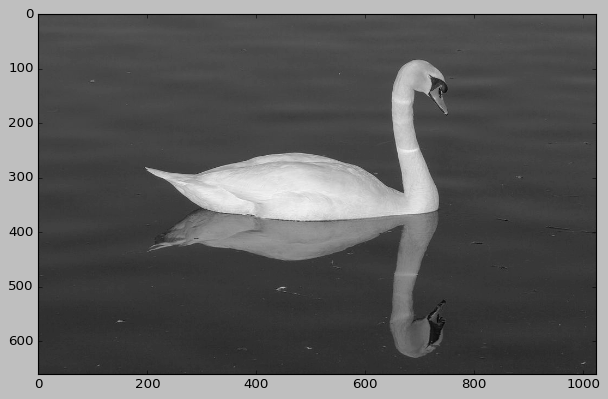

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F6EA0041D50>


In [13]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [14]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [15]:
U.shape

(660, 660)

In [16]:
V.shape

(1024, 1024)

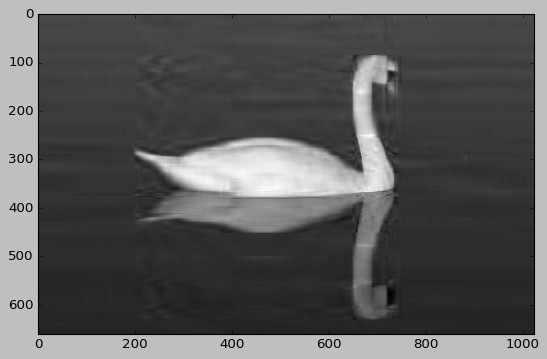

Felicidades la imagen está comprimida


In [19]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 15
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 78.  95.  92. ... 179. 176. 172.]


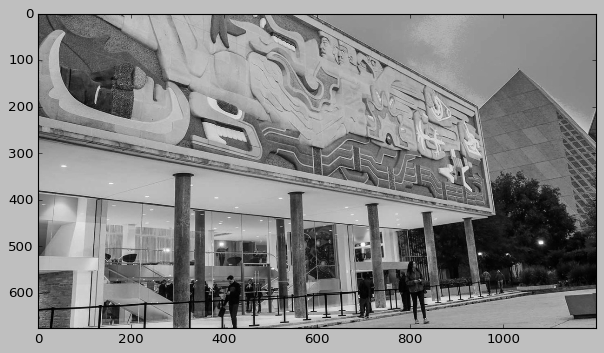

<PIL.Image.Image image mode=LA size=1200x675 at 0x7F6E9E3F8CD0>


In [20]:
#imagen 1
plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://tec.mx/sites/default/files/styles/rectangular/public/repositorio/Home/rectoria-tec-de-monterrey-regreso-consciente.jpg?itok=BxTwNx8w')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

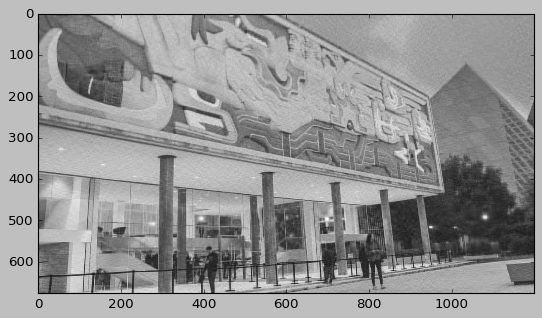

Felicidades la imagen está comprimida


In [22]:
# SVD
U1,D1,V1 = np.linalg.svd(imgmat1)

# Compresión de imagen
nvalue1 = 100
#------------------------------
reconstimg1 = np.matrix(U1[:,:nvalue1])*np.diag(D1[:nvalue1])*np.matrix(V1[:nvalue1,:])

plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

---

[157. 157. 157. ... 148. 142. 139.]


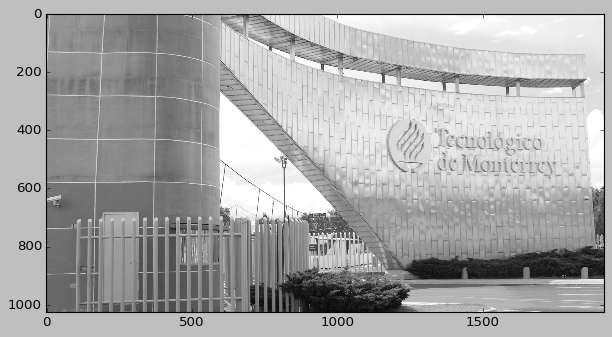

<PIL.Image.Image image mode=LA size=1920x1024 at 0x7F6E9E1FFE10>


In [23]:
#imagen 2
plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://conecta.tec.mx/sites/default/files/styles/header_full/public/2021-06/campus-tec-de-monterrey-conecta.jpg?itok=DSbn7gIJ')).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

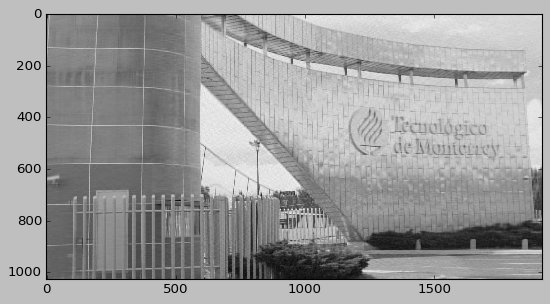

Felicidades la imagen está comprimida


In [24]:
# SVD
U2,D2,V2 = np.linalg.svd(imgmat2)

# Compresión de imagen
nvalue2 = 100
#------------------------------
reconstimg2 = np.matrix(U2[:,:nvalue2])*np.diag(D2[:nvalue2])*np.matrix(V2[:nvalue2,:])

plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

---

[64. 75. 88. ... 84. 83. 82.]


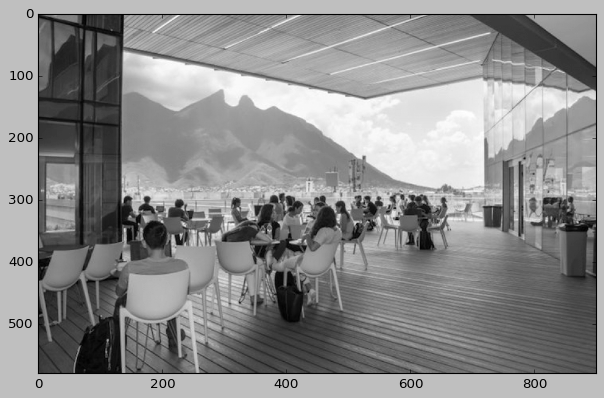

<PIL.Image.Image image mode=LA size=900x579 at 0x7F6E9E1FFB50>


In [25]:
#imagen 3
plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://www.eitmedia.mx/media/k2/items/cache/e69d533f72d46fb2e8f549f9cf1172bb_XL.jpg')).convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

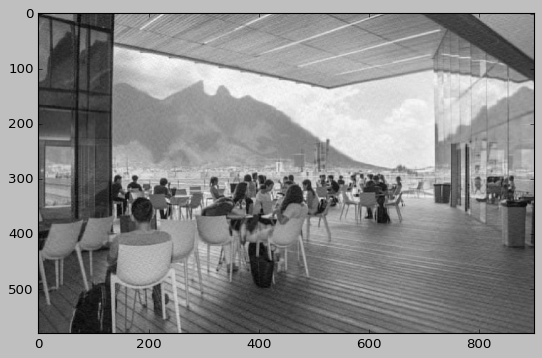

Felicidades la imagen está comprimida


In [26]:
# SVD
U3,D3,V3 = np.linalg.svd(imgmat3)

# Compresión de imagen
nvalue3 = 100
#------------------------------
reconstimg3 = np.matrix(U3[:,:nvalue3])*np.diag(D3[:nvalue3])*np.matrix(V3[:nvalue3,:])

plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [27]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

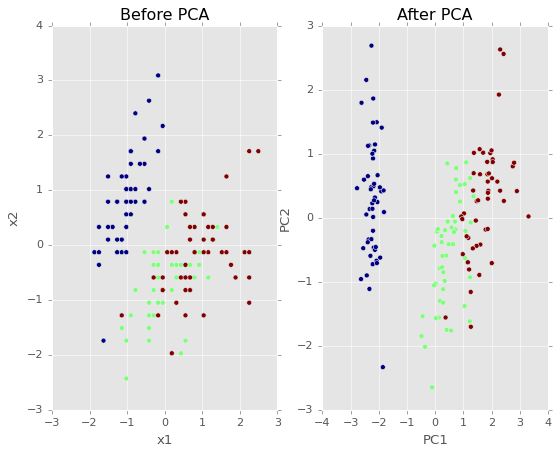

In [28]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [31]:
# Feature importance
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Descubrimientos:
1. **La reducción de variables con PCA sigue explicando gran porcentaje de la variabilidad de los datos en este caso en específico (95%)**. Esto puede ser principalmente debido a que, al ser un conjunto de datos con poco número de variables (3) de por sí, la reducción de una sola dimensión no significa una pérdida de información significativa.
2. **Las variables de mayor peso en la PC1** (X1, X2, X3), **son las de menor peso en la PC2 y viceversa**.